# Taller: Análisis de Instagram con Apify API + Gemini  
Autor: (Sara Gabriela Quintero Gamboa)  
Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts.  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini.  
5. Segmentar autores o posts según métricas de engagement.  
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [4]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv

--2025-11-19 23:37:32--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv [following]
--2025-11-19 23:37:32--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18361753 (18M) [text/plain]
Saving to: ‘instagram_posts.csv’

instagram_posts.csv 100%[===================>]  17.51M 

In [5]:
import pandas as pd


In [6]:
!pip install -qU requests pandas google-generativeai nltk seaborn wordcloud scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 81.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [7]:
df = pd.read_csv('instagram_posts.csv')
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors
0,https://www.instagram.com/f1/,3637646598679593202,f1,https://www.instagram.com/p/DJ7hE70tIDy/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/f1/,3637494954817152582,f1,https://www.instagram.com/p/DJ6-mOeJuZG/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,f1movie,Original audio,True,False,NaN,1.403914e+15,NaN,NaN,NaN,NaN
2,https://www.instagram.com/f1/,3637535605467005779,f1,https://www.instagram.com/p/DJ7H1xVskNT/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/f1/,3635278159597499148,f1,https://www.instagram.com/p/DJzGjnCi3MM/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/f1/,3637456706674459999,f1,https://www.instagram.com/p/DJ615pHMYVf/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,Monaco,16366456.0,NaN,NaN


In [8]:
df.columns

Index(['inputUrl', 'id', 'username', 'url', 'fullName', 'biography',
       'externalUrls', 'externalUrl', 'externalUrlShimmed', 'followersCount',
       'followsCount', 'hasChannel', 'highlightReelCount', 'isBusinessAccount',
       'joinedRecently', 'businessCategoryName', 'private', 'verified',
       'profilePicUrl', 'profilePicUrlHD', 'igtvVideoCount', 'relatedProfiles',
       'latestIgtvVideos', 'postsCount', 'fbid', 'type', 'shortCode',
       'caption', 'hashtags', 'mentions', 'commentsCount', 'firstComment',
       'latestComments', 'dimensionsHeight', 'dimensionsWidth', 'displayUrl',
       'images', 'alt', 'likesCount', 'timestamp', 'childPosts',
       'ownerFullName', 'ownerUsername', 'ownerId', 'isSponsored',
       'taggedUsers', 'coauthorProducers', 'isCommentsDisabled', 'videoUrl',
       'videoViewCount', 'videoPlayCount', 'productType', 'videoDuration',
       'isPinned', 'musicInfo.artist_name', 'musicInfo.song_name',
       'musicInfo.uses_original_audio', 'musicI


### 🔍 Preguntas – Sección 1 (Exploración)

1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [9]:
df.shape

(200, 64)

In [10]:
df["type"].value_counts()

,count
type,
Video,86
Sidecar,83
Image,31


In [11]:
from datetime import datetime
datetime.fromtimestamp(int())

datetime.datetime(1970, 1, 1, 0, 0)

In [12]:
df["date"] = pd.to_datetime(df["timestamp"])

In [13]:
df["date"].max()

Timestamp('2025-05-21 21:01:28+0000', tz='UTC')

In [14]:
df["date"].min()

Timestamp('2025-05-05 00:59:11+0000', tz='UTC')

In [15]:
df['likesCount'].sort_values(ascending=False)

,likesCount
138,1927755
184,1886670
175,1812728
176,1734008
3,1590803
...,...
57,98256
125,98127
55,84260
1,83824


In [18]:
df[df["likesCount"] == df["likesCount"].max()]

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors,date
138,https://www.instagram.com/f1/,3630879158915563525,f1,https://www.instagram.com/p/DJjeVuZiAAF/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-12 12:55:46+00:00


In [ ]:
df['likesCount'].max()

1927755


## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Enumera tres tipos de “ruido” que removerás (URLs, emojis, menciones, etc.) y da un ejemplo de cada uno.


Es importante limpiar, ya que los datos de redes sociales traen muchos ruidos que interrumpen el analisis eficiente de los datos. Los hace más homogéneo, relevante y útil para el análisis.
Removería los emogis, etiquetas y enlaces.
Ejemplos: Monte Carlo ready 😍, @JuanGalindo y http

In [40]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head(100)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,caption,caption_clean
0,It certainly got the drivers’ seal of approval...,it certainly got the drivers’ seal of approval...
1,It’s go time! Get your tickets for #F1TheMovie...,it’s go time get your tickets for f1themovie n...
2,Rolling up to #F1TheMovie! 🤩 Our drivers have ...,rolling up to f1themovie 🤩 our drivers have ar...
3,A DOMINANT WIN FROM MAX VERSTAPPEN!! 👏\n\nThe ...,a dominant win from max verstappen 👏 the reign...
4,Monte Carlo ready 😍🇲🇨\n\n#McLaren #M7AReborn #F1,monte carlo ready 😍🇲🇨 mclaren m7areborn f1
...,...,...
95,Franco didn’t receive the ‘it’s only practice’...,franco didn’t receive the ‘it’s only practice’...
96,Getting dialled in 😮‍💨\n\nFranco Colapinto is ...,getting dialled in 😮‍💨 franco colapinto is pre...
97,Imola honours Ayrton Senna and Roland Ratzenbe...,imola honours ayrton senna and roland ratzenbe...
98,“No Room For A Saint” 🎵 💿 my new tune from #F1...,“no room for a saint” 🎵 💿 my new tune from f1t...



## 😊 Sección 3 (Sentimiento)

7. Presenta la distribución global de sentimientos y comenta.  
8. ¿Qué tipo de contenido genera mayor proporción de sentimientos positivos y negativos?  
9. Elige un pico de sentimiento negativo y analiza el contexto con un ejemplo de post.


In [41]:
import os

In [42]:
import os


from openai import OpenAI

client = OpenAI()

In [43]:
from openai import OpenAI

client = OpenAI()


In [44]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [48]:
call_llm("quiero clasificar los contenidos de unos post de instagram de la formula uno, dame tres categorías")

'Claro, aquí tienes tres categorías para clasificar los contenidos de los post de Instagram de la Fórmula Uno:\n\n1. **Carreras y Resultados**: Esta categoría incluye publicaciones sobre eventos de carreras, resultados de las mismas, clasificaciones de pilotos y equipos, y momentos destacados de cada Gran Premio.\n\n2. **Pilotos y Equipos**: Contenidos que se centran en los pilotos y sus equipos, como entrevistas, perfiles, entrenamientos, interacciones en redes sociales y cualquier hito personal o profesional.\n\n3. **Detrás de Escenas y Tecnología**: Publicaciones que muestran lo que ocurre fuera de las carreras, como el desarrollo de los autos, la tecnología utilizada, el trabajo en equipo y las actividades en los paddocks.\n\nEstas categorías pueden ayudarte a organizar y analizar el contenido de manera efectiva.'

In [46]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['sentimiento'] = sample['caption_clean'].apply(classify_sentiment)


In [ ]:
sample['sentimiento'].value_counts()


,count
sentimiento,
positivo,8
neutral,2


<Axes: xlabel='sentimiento', ylabel='count'>

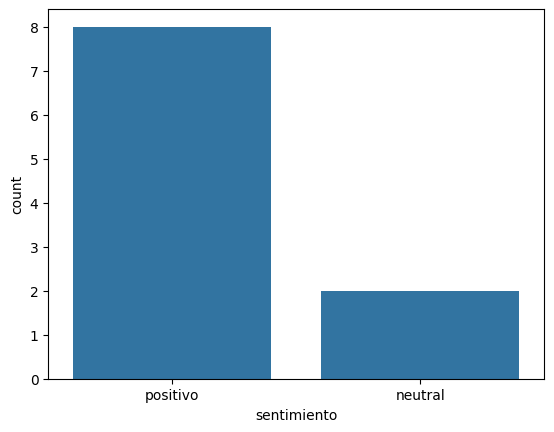

In [47]:
import seaborn as sns
sns.barplot(sample["sentimiento"].value_counts())


## 🗂 Sección 4 (Temas)
9. Haga lo mismo con sentidimiento con tipo de contenido y tema
10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [51]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el tipo de contenido del siguiente caption de Instagram como "
              f"'resultados_estadísticas', 'entre_bastidores' o 'tecnología_vehículos' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['topic'] = sample['caption_clean'].apply(classify_sentiment)


In [52]:
sample['topic'].value_counts()

,count
topic,
entre_bastidores,6
resultados_estadísticas,3
tecnología_vehículos,1


In [56]:
pd.crosstab(sample["type"],sample["topic"])

topic,entre_bastidores,resultados_estadísticas,tecnología_vehículos
type,,,
Image,0,1,1
Sidecar,1,2,0
Video,5,0,0


<Axes: xlabel='topic', ylabel='count'>

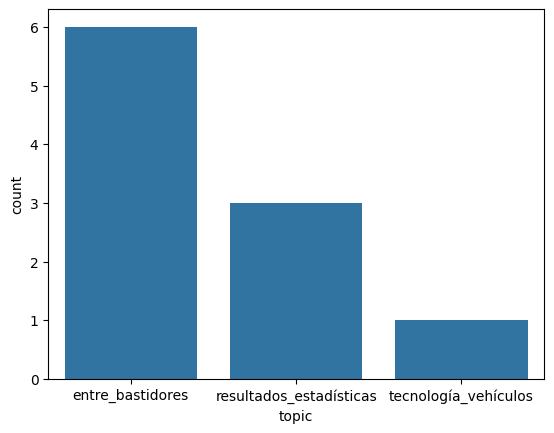

In [57]:
sns.barplot(sample["topic"].value_counts())

<Axes: xlabel='topic', ylabel='type'>

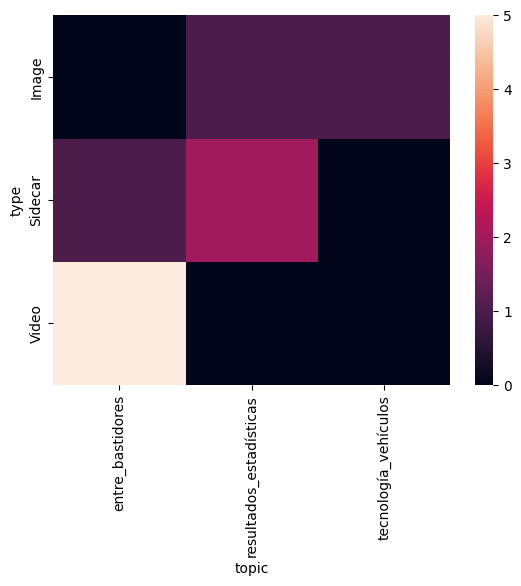

In [58]:
sns.heatmap(pd.crosstab(sample["type"],sample["topic"]))

In [60]:
call_llm("ayúdame a crear dos insight para el tema dominante, según el gráfico el tema dominante es tecnología vehículos")

'Claro, aquí tienes dos insights sobre el tema de la tecnología en vehículos:\n\n1. **Eficiencia Energética y Sostenibilidad**: La integración de tecnologías avanzadas en los vehículos, como motores eléctricos y sistemas de gestión de energía, está revolucionando la industria automotriz al promover una movilidad más sostenible. Esto no solo reduce la huella de carbono, sino que también responde a la creciente demanda de soluciones de transporte que respeten el medio ambiente. Las marcas que inviertan en I+D para mejorar la eficiencia energética probablemente captarán una mayor cuota de mercado en un futuro cercano.\n\n2. **Conectividad y Experiencia del Usuario**: La implementación de sistemas de conectividad en los vehículos, como la navegación avanzada y el control de dispositivos inteligentes, está transformando la experiencia del conductor y los pasajeros. Esto sugiere que las empresas automotrices deben enfocarse en ofrecer experiencias integradas que combinen la comodidad, la seg

El tema dominante, según el gráfico es tecnología vehículos

- El contenido de imagenes es el que muestra la mayor proporción de sentimientos positivos.
-  Según los resultados de la tabla no se encontraron sentimientos negativos, por ende, no podemos mostrar un ejemplo de un post que lo demuestre


## 👥 Sección 5 (Segmentación)

13. Describe cada cluster en una frase (actividad y tono).  
14. ¿Qué segmento priorizarías para viralizar un mensaje y por qué?  
15. Propón una acción de engagement distinta para cada segmento.


In [61]:
call_llm(""" Describe cada cluster en una fase (actividad y tono). Dámelo como una lista de python.topic entre_bastidores resultados_estadisticos tecnología_vehiculos
type
Image 0 2
Sidecar 1 2
Video 5 0
""")

'Claro, aquí tienes una lista de Python donde cada elemento describe un clúster en función de la fase (actividad y tono):\n\n```python\nclusters = [\n    {\n        "fase": "entre_bastidores",\n        "actividad": "Imágenes detrás de escena de la producción",\n        "tono": "informal y cercano"\n    },\n    {\n        "fase": "resultados_estadisticos",\n        "actividad": "Análisis de datos y métricas de desempeño",\n        "tono": "informativo y analítico"\n    },\n    {\n        "fase": "tecnología_vehiculos",\n        "actividad": "Discusión sobre innovaciones y características de los vehículos",\n        "tono": "técnico y entusiasta"\n    },\n]\n```\n\nEste formato organiza la información de manera clara y accesible.'


## 📝 Sección 6 (Micro‑campaña)

16. Presenta tus tres captions generados.  
17. Justifica  
&nbsp;&nbsp;a) Tema elegido.  
&nbsp;&nbsp;b) Tono y horario óptimos.  
18. Define un KPI de éxito y la meta para la campaña.


In [66]:
lista_tonos  =  [   {       "fase": "entre_bastidores",      "actividad": "Imágenes detrás de escena de la producción",        "tono": "informal y cercano"    },  {        "fase": "resultados_estadisticos",        "actividad": "Análisis de datos y métricas de desempeño",        "tono": "informativo y analítico"    },
                 {        "fase": "tecnología_vehiculos",       "actividad": "Discusión sobre innovaciones y características de los vehículos",    "tono": "técnico y entusiasta"   }]

In [69]:
def generar_caption(topic, tone):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres "
              f"sobre el tema '{topic}'. Tono {tone}. No incluyas hashtags ni menciones.")
    return call_llm(prompt)

for lista in lista_tonos:
   print(generar_caption(lista["actividad"], lista["tono"]))
   print ("________")

¡Echad un vistazo a lo que no se ve! 🎬✨ Cada imagen detrás de escena cuenta una historia: risas, esfuerzo y muchas anécdotas. ¡La magia comienza aquí y estamos felices de compartirla con ustedes!
________
El análisis de datos y métricas de desempeño es crucial para tomar decisiones informadas. Medir resultados permite identificar tendencias y optimizar estrategias, maximizando así la efectividad de nuestras acciones. ¡Aprovecha el poder de los datos!
________
¡Explora las últimas innovaciones en el mundo automotriz! Desde la electrificación hasta la conectividad avanzada, cada vehículo se transforma en una experiencia única. Únete a la conversación sobre el futuro de la movilidad. ¡Tu opinión cuenta!
________



### 📦 Exporta y entrega

1. Ejecuta todo el notebook (**Runtime → Run all**).  
2. Descarga el notebook (File → Download → .ipynb) y el memo en *PDF* o *Markdown*.  
3. Sube ambos archivos a la plataforma de la clase antes de la fecha establecida.
